In [1]:
import whisper
import pyaudio
import numpy as np
import wave
import os
import noisereduce as nr
import matplotlib.pyplot as plt
from IPython.display import Audio, display

C:\Users\Mussa\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# List available input audio devices and their names
p = pyaudio.PyAudio()
print("Available input devices:")
for i in range(p.get_device_count()):
    device_info = p.get_device_info_by_index(i)
    print(f"{i}: {device_info['name']}")

In [ ]:
# Select the desired input device by its ID (replace with the appropriate ID)
selected_device_id = 1  # Change this to the ID of your desired input device

In [ ]:
# Set the parameters for audio recording
sample_rate = 16000  # You can adjust this based on your needs
duration = 5  # Recording duration in seconds

# Function to reduce noise from audio
def reduce_noise(audio_data, sample_rate):
    # Apply noise reduction using the noisereduce library
    reduced_audio = nr.reduce_noise(y=audio_data, sr=sample_rate)
    return reduced_audio

In [ ]:
# Record audio from the selected input device
print(f"Recording audio from {p.get_device_info_by_index(selected_device_id)['name']}. Please speak...")
audio = []

stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=sample_rate,
                input=True,
                input_device_index=selected_device_id,
                frames_per_buffer=1024)

for _ in range(0, int(sample_rate / 1024 * duration)):
    data = stream.read(1024)
    audio.append(data)

print("Recording complete.")

In [ ]:
# Save the recorded audio as a WAV file
# Define the output directory and filename for saving the recorded audio
output_dir = "recordings"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "recorded_audio.wav")

with wave.open(output_file, 'wb') as wf:
    wf.setnchannels(1)  # Mono audio
    wf.setsampwidth(2)  # 2 bytes per sample
    wf.setframerate(sample_rate)
    wf.writeframes(b''.join(audio))

print(f"Audio saved as {output_file}")

# Close the audio stream
stream.stop_stream()
stream.close()
p.terminate()

In [61]:
# # Load the recorded audio using whisper
# signal, _ = whisper.load(output_file)

# Load the recorded audio file
audio_file = "recordings/recorded_audio.wav"

In [62]:
# Open the audio file
with wave.open(audio_file, 'rb') as wf:
    # Get audio data
    audio_data = wf.readframes(-1)
    audio_data = np.frombuffer(audio_data, dtype=np.int16)

    # Get sample rate and duration
    sample_rate = wf.getframerate()
    duration = len(audio_data) / sample_rate

# Create a time array for x-axis (in seconds)
time = np.linspace(0, duration, len(audio_data))

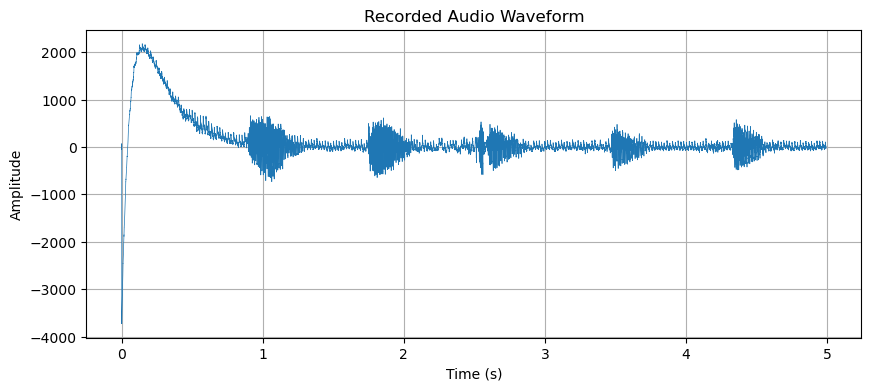

Numerical representation of the recorded audio:
[  -14    17   -20    23   -26    29   -32    35   -38    42   -49    69
  -210 -3351 -3727 -3565 -3680 -3572 -3651 -3566 -3626 -3559 -3605 -3553
 -3579 -3526 -3551 -3521 -3530 -3509 -3514 -3498 -3498 -3488 -3479 -3475
 -3471 -3465 -3459 -3450 -3443 -3436 -3424 -3418 -3418 -3410 -3397 -3388
 -3385 -3378 -3364 -3360 -3349 -3344 -3337 -3332 -3320 -3313 -3307 -3296
 -3300 -3295 -3290 -3275 -3270 -3260 -3253 -3250 -3244 -3237 -3233 -3226
 -3217 -3206 -3189 -3186 -3180 -3168 -3154 -3142 -3137 -3138 -3125 -3118
 -3107 -3101 -3096 -3083 -3080 -3071 -3065 -3054 -3037 -3029 -3026 -3009
 -3004 -2994 -2980 -2969 -2965 -2953 -2943 -2931 -2930 -2923 -2911 -2912
 -2901 -2899 -2882 -2871 -2865 -2863 -2857 -2848 -2841 -2831 -2826 -2812
 -2805 -2800 -2791 -2790 -2775 -2766 -2757 -2749 -2740 -2738 -2734 -2726
 -2725 -2712 -2690 -2680 -2657 -2633 -2623 -2602 -2590 -2574 -2561 -2556
 -2543 -2536 -2528 -2524 -2515 -2512 -2510 -2504 -2499 -2494 -2490 -2473
 -2

In [63]:
# Plot the audio waveform
plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, lw=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Recorded Audio Waveform")
plt.grid(True)
plt.show()

# Adjust NumPy print options to display the full array without truncation
np.set_printoptions(threshold=np.inf)

# Print the numerical representation of the audio
print("Numerical representation of the recorded audio:")
print(audio_data)

# Play the recorded audio in the notebook
if os.path.exists(output_file):
    display(Audio(filename=output_file))

In [ ]:
# You can now perform voice recognition using the extracted features
# This may involve training a machine learning model or using a pre-trained model
# The specific recognition process will depend on your use case